# Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
#step 1...Import libraries
import pandas as pd
import numpy as np

#step 2,3..import dataset & assign to variable

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')
print(users.head(10))

#step 4 ...Discover what is the mean age per occupation

mean_age = users.groupby('occupation')['age'].mean()
print("\nMean age by occupation:\n ")
print(mean_age)

#Step 5..Discover the Male ratio per occupation and sort it from the most to the least

male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()
male_ratio_sorted = male_ratio.sort_values(ascending=False)
print('\nMale ratio per occupation from the most to the least:\n ')
print(male_ratio_sorted)

#Step 6...For each occupation, calculate the minimum and maximum ages

min_max_ages = users.groupby('occupation')['age'].agg(['min', 'max'])
print('\nMinimum and Maximum Ages per Occupation:\n')
print(min_max_ages)


#Step 7 ...For each combination of occupation and sex, calculate the mean age

mean_age_per_comb = users.groupby(['occupation', 'gender'])['age'].mean()
print('\nMean Age per Combination of Occupation and Gender:\n ')
print(mean_age_per_comb)

#Step 8...For each occupation present the percentage of women and men

gender_percent_occup = users.groupby(['occupation', 'gender'])['gender'].count() / users.groupby('occupation')['gender'].count() * 100
print('\nPercentage of Gender per Occupation:\n')
print(gender_percent_occup)

   user_id  age gender     occupation zip_code
0        1   24      M     technician    85711
1        2   53      F          other    94043
2        3   23      M         writer    32067
3        4   24      M     technician    43537
4        5   33      F          other    15213
5        6   42      M      executive    98101
6        7   57      M  administrator    91344
7        8   36      M  administrator    05201
8        9   29      M        student    01002
9       10   53      M         lawyer    90703

Mean age by occupation:
 
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman     

# Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team

In [2]:
#Step 1...Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2 & 3...Import the dataset, assign to variable

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [3]:
#Step 4 ...Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [4]:
#Step 5...How many team participated in the Euro2012?

euro12.shape[0]

16

In [5]:
#Step 6...What is the number of columns in the dataset?

euro12.shape[1]

35

In [6]:
#Step 7...View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [7]:
#Step 8...Sort the teams by Red Card then to Yellow Card
cards = euro12.sort_values(by=['Red Cards', 'Yellow Cards'])
cards

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16


In [8]:
#Step 9...Calculate the mean Yellow Cards given per Team
discipline.groupby('Team').mean()['Yellow Cards']

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [9]:
#Step 10...Filter teams that scored more than 6 goals
euro12[euro12['Goals']>6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

In [10]:
#Step 11... Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

In [11]:
#Step 12...Select the first 7 columns
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [12]:
#Step 13...Select all columns except the last 3
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [13]:
#Step 14...Present only the Shooting Accuracy from England, Italy and Russia
df = euro12[(euro12.Team == "England") | (euro12.Team == "Italy") | (euro12.Team == "Russia")]
df[["Team","Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [14]:
#Step 1...Import the necessary libraries
import pandas as pd
import numpy as np

#Step 2...Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

sr1 = pd.Series(np.random.randint(1, 5, size=100))
sr2 = pd.Series(np.random.randint(1, 4, size=100))
sr3 = pd.Series(np.random.randint(10000, 30001, size=100))
print(sr1,sr2,sr3)

#Step 3...Create a DataFrame by joinning the Series by column & 
#Step 4...Change the name of the columns to bedrs, bathrs, price_sqr_meter

df = pd.DataFrame({'bedrs':sr1, 'bathrs':sr2, 'price_sqr_meter':sr3})
df

0     4
1     2
2     1
3     2
4     2
     ..
95    2
96    4
97    3
98    2
99    4
Length: 100, dtype: int64 0     2
1     1
2     3
3     3
4     1
     ..
95    2
96    1
97    1
98    3
99    1
Length: 100, dtype: int64 0     11932
1     22126
2     28425
3     18642
4     20083
      ...  
95    26117
96    29214
97    14364
98    28272
99    15046
Length: 100, dtype: int64


,bedrs,bathrs,price_sqr_meter
0,4,2,11932
1,2,1,22126
2,1,3,28425
3,2,3,18642
4,2,1,20083
...,...,...,...
95,2,2,26117
96,4,1,29214
97,3,1,14364
98,2,3,28272


In [15]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcol = pd.concat([sr1, sr2, sr3])
bigcol

0         4
1         2
2         1
3         2
4         2
      ...  
95    26117
96    29214
97    14364
98    28272
99    15046
Length: 300, dtype: int64

#Step 6...Ops it seems it is going only until index 99. Is it true?
Yes It is true

In [16]:
#Step 7...Reindex the DataFrame so it goes from 0 to 299
bigcol = bigcol.reset_index(drop=True)
bigcol.reset_index()
bigcol.reindex(index=range(0,299))

0          4
1          2
2          1
3          2
4          2
       ...  
294    29092
295    26117
296    29214
297    14364
298    28272
Length: 299, dtype: int64

# Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [21]:
#Step 1...Import libraries
import pandas as pd
import numpy as np

#Step 2...Import the dataset from the attached file wind.txt
data = pd.read_csv("wind (1).txt")
data = pd.read_table('wind (1).txt', sep='\s+', parse_dates=[[0,1,2]])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [22]:
#Step 3...Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

import datetime
def date_fix(D):
    year = D.year - 100 if D.year > 1988 else D.year
    return datetime.date(year, D.month ,D.day)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(date_fix)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [23]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [24]:
#Step 6... Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [25]:
#Step 7... Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [26]:
#Step 8... Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean().mean()

10.227982360836938

In [27]:
#Step 9... Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
def loc_stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(loc_stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [28]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

day_stats


,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [29]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [30]:
#Step 12... Downsample the record to a yearly frequency for each location.
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [31]:
#Step...Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [32]:
#Step 14... Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [33]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
stand_dev = data.resample('W').mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
print(stand_dev)

          RPT         VAL         ROS         KIL         SHA         BIR  \
0  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
1    3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
2   24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   
3   12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
4    3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   

          DUB         CLA         MUL         CLO         BEL         MAL  
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
1    2.471429    2.284286    2.262857    1.571429    3.661429    5.124286  
2   20.474286   17.861429   17.460000   17.932857   26.617143   30.374286  
3    9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
4    3.308180    2.853029    2.638349    2.924546    3.757189    4.468526  


# Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [36]:
#Step 1..Import the libraries , Step 2 import the dataset, Step 3 Assign it to a variable called chipo and Step 4 See the first 10 entries

import pandas as pd
chipo = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')
chipo[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [37]:
# Step 5... What is the number of observations in the dataset?
chipo.shape[0]

4622

In [38]:
# Step 6... What is the number of columns in the dataset?
chipo.shape[1]

5

In [39]:
#Step 7...Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [40]:
#Step 8... How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [41]:
#Step 9... Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item

'Chicken Bowl'

In [42]:
#Step 10... For the most-ordered item, how many items were ordered?
most_ordered_count = chipo['item_name'].value_counts().max()
most_ordered_count

726

In [43]:
#Step 11... What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
most_ordered_choice

'[Diet Coke]'

In [90]:
#Step 12... How many items were orderd in total?
chipo['quantity'].sum()

4972

In [99]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

chipo.item_price.dtype


dtype('float64')

In [100]:
chipo['item_price']=chipo['item_price'].astype(float)

In [101]:
chipo.item_price.dtype

dtype('float64')

In [102]:
#Step 14... How much was the revenue for the period in the dataset?
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue is : $ '+ str(revenue))

Revenue is : $ 39237.02


In [103]:
#Step 15... How many orders were made in the period?
num_of_orders = len(chipo.order_id.unique())
num_of_orders

1834

In [73]:
#Step 16... What is the average revenue amount per order?
avg_rev_per_order = revenue / num_of_orders
avg_rev_per_order

21.39423118865867

In [68]:
#Step 17... How many different items are sold?
len(chipo.item_name.unique())

50

# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

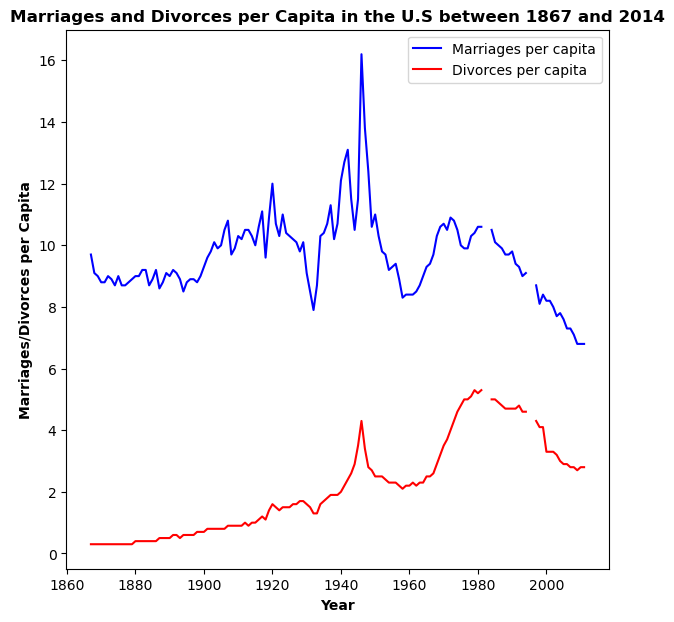

In [51]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#read dataset
data = pd.read_csv('us-marriages-divorces-1867-2014 (1).csv')
plt.figure(figsize=(7, 7))
#plot line chart
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per capita', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per capita', color='red')
plt.title('Marriages and Divorces per Capita in the U.S between 1867 and 2014', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Marriages/Divorces per Capita', fontweight='bold')
plt.legend()

plt.show()



# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

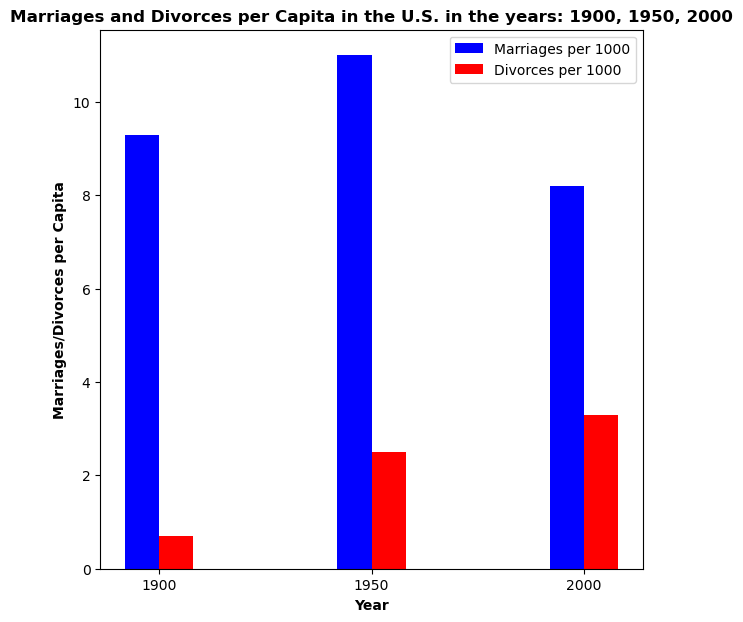

In [52]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('us-marriages-divorces-1867-2014 (1).csv')
#set parameters
exact_years = [1900, 1950, 2000]
exact_data = data[data['Year'].isin(exact_years)]
plt.figure(figsize=(7, 7))
bar_width=8
plt.bar(exact_data['Year'], exact_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color='blue')
plt.bar(exact_data['Year'] + bar_width, exact_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color='red')
#plot the chart
plt.title('Marriages and Divorces per Capita in the U.S. in the years: 1900, 1950, 2000', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Marriages/Divorces per Capita', fontweight='bold')
plt.xticks(exact_data['Year'] + bar_width / 2, exact_years)
plt.legend()

plt.show()

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

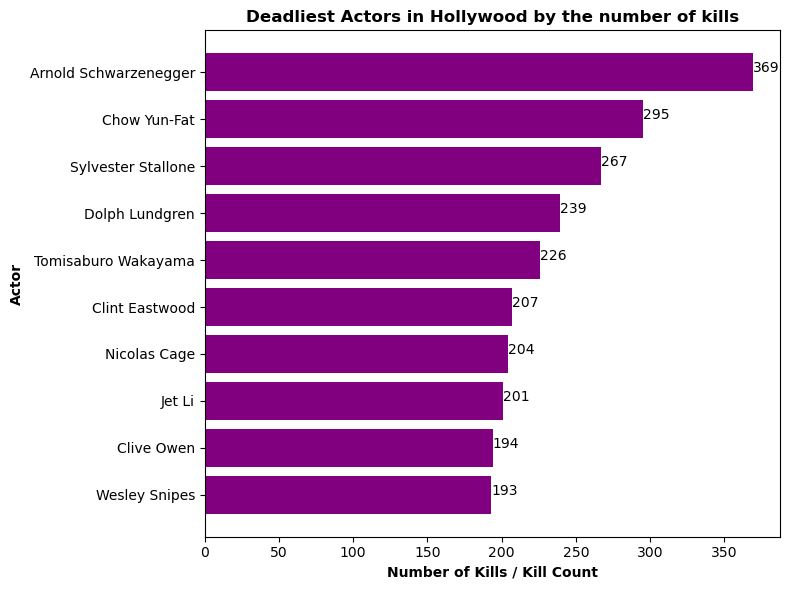

In [53]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("actor_kill_counts (1).csv")

# sort the data by values from ascending
sort_data = data.sort_values(by='Count', ascending=True)
plt.figure(figsize=(8, 6))

#make bar horizontal
plt.barh(sort_data['Actor'], sort_data['Count'], color='purple')
plt.xlabel('Number of Kills / Kill Count', fontweight ='bold')
plt.ylabel('Actor', fontweight ='bold')
plt.title('Deadliest Actors in Hollywood by the number of kills', fontweight ='bold')
plt.tight_layout()

for index, value in enumerate(sort_data['Count']):
    plt.text(value, index, str(value))

plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

Text(0.5, 1.0, "Roman Emperors' Cause of Death")

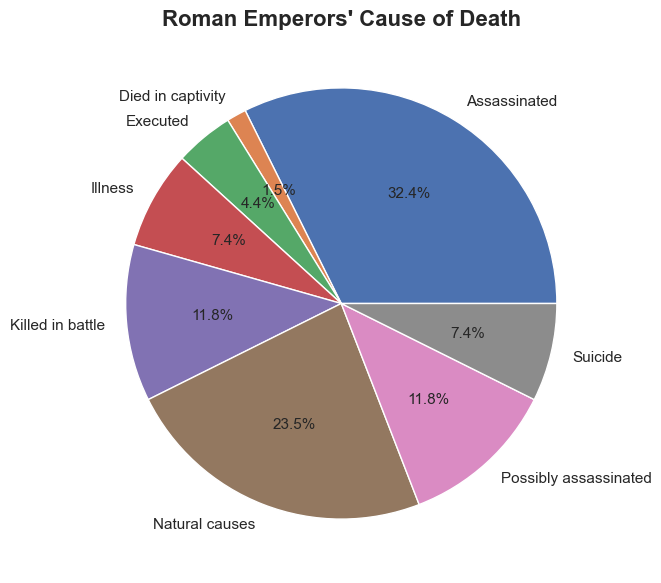

In [57]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

data = pd.read_csv('roman-emperor-reigns (1).csv')
grouped_data = data.groupby("Cause_of_Death")['Emperor'].count()
grouped_data.plot.pie(autopct="%.1f%%", figsize = (7,7) , fontsize = 11, ylabel = '')
plt.title("Roman Emperors' Cause of Death", fontsize = 16, fontweight ='bold')

# Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0, 0.5, 'Computer Science PhDs Awarded In the US')

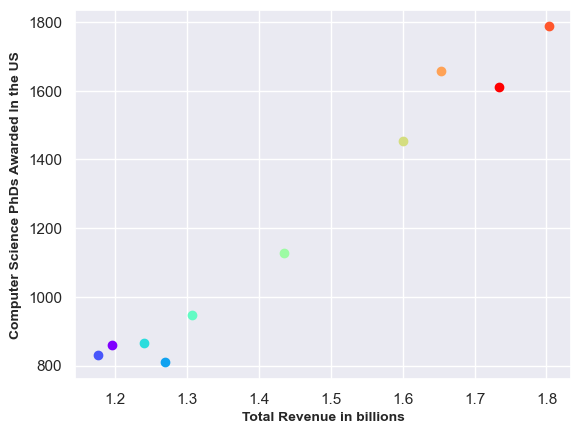

<Figure size 500x500 with 0 Axes>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


arc_revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates (1).csv')
arc_revenue = arc_revenue_data['Total Arcade Revenue (billions)'].values
cs_doctorates = arc_revenue_data['Computer Science Doctorates Awarded (US)'].values
fig, p = plt.subplots()
plt.figure(figsize=(5,5))
colors = cm.rainbow(np.linspace(0, 1, len(arc_revenue_data['Year'])))
for i in range(len(arc_revenue_data['Year'])):
    p.scatter(arc_revenue[i], cs_doctorates[i],color=colors[i])
    
p.set_xlabel('Total Revenue in billions', fontsize = 10, fontweight ='bold')
p.set_ylabel('Computer Science PhDs Awarded In the US', fontsize = 10, fontweight ='bold')